In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain.prompts import PromptTemplate
import os

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI()

In [4]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    
    strike_rate: float
    balls_per_boundary: float
    boundary_percentage: float
    
    summary: str

In [5]:
def calculate_strike_rate(state: BatsmanState):
    sr = (state["runs"] / state["balls"]) * 100
    return {"strike_rate": round(sr, 2)}

def calculate_balls_per_boundary(state: BatsmanState):
    if state["fours"] + state["sixes"] > 0:
        bpb = state["balls"] / (state["fours"] + state["sixes"])
    else:
        bpb = state["balls"]
    return {"balls_per_boundary": round(bpb, 2)}

def calculate_boundary_percentage(state: BatsmanState):
    if state["balls"] > 0:
        bp = ((state["fours"] + state["sixes"]) / state["balls"]) * 100
    else:
        bp = 0
    return {"boundary_percentage": round(bp, 2)}

def summary(state: BatsmanState) -> str:
    summary = f"""
    Runs: {state['runs']},
    Balls: {state['balls']},
    Fours: {state['fours']},
    Sixes: {state['sixes']},
    Strike Rate: {state['strike_rate']:.2f},
    Balls per Boundary: {state['balls_per_boundary']:.2f},
    Boundary Percentage: {state['boundary_percentage']:.2f}
    """
    return {"summary": summary}

In [6]:
# Define the graph
graph = StateGraph(BatsmanState)

# Add the nodes
graph.add_node("calculate_strike_rate", calculate_strike_rate)
graph.add_node("calculate_balls_per_boundary", calculate_balls_per_boundary)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("summary", summary)

# Define the edges
graph.add_edge(START, "calculate_strike_rate")
graph.add_edge(START, "calculate_balls_per_boundary")
graph.add_edge(START, "calculate_boundary_percentage")

graph.add_edge("calculate_strike_rate", "summary")
graph.add_edge("calculate_balls_per_boundary", "summary")
graph.add_edge("calculate_boundary_percentage", "summary")
graph.add_edge("summary", END)

# Compile the graph
workflow = graph.compile()

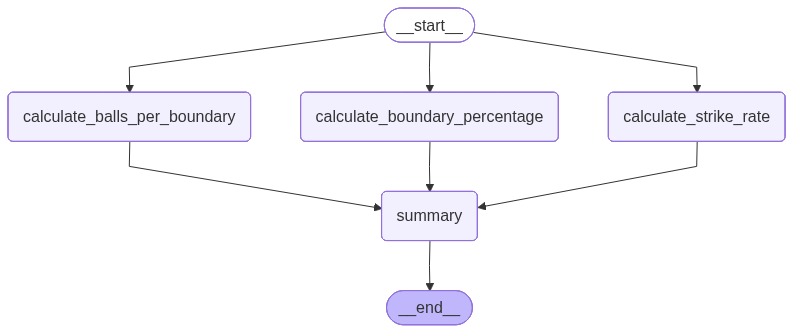

In [7]:
workflow

In [8]:
initial_state = {
    "runs": 114,
    "balls": 87,
    "fours": 12,
    "sixes": 4
}

workflow.invoke(initial_state)

{'runs': 114,
 'balls': 87,
 'fours': 12,
 'sixes': 4,
 'strike_rate': 131.03,
 'balls_per_boundary': 5.44,
 'boundary_percentage': 18.39,
 'summary': '\n    Runs: 114,\n    Balls: 87,\n    Fours: 12,\n    Sixes: 4,\n    Strike Rate: 131.03,\n    Balls per Boundary: 5.44,\n    Boundary Percentage: 18.39\n    '}